## Домашнее задание к лекции «Функции и работа с данными»


Преподаватель: Константин Башевой


### Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

* оценка 2 и ниже — низкий рейтинг;
* оценка 4 и ниже — средний рейтинг;
* оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

Эти строки считывают данные из двух файлов `ratings.csv` и `movies.csv` и создают две таблицы `ratings` и `movies` с помощью функции `read_csv()` из библиотеки `pandas`.

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [7]:
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


Эта строка объединяет таблицы `ratings` и `movies` по столбцу `movieId` с помощью метода `merge()`. 
Параметр `on='movieId'` указывает, что объединение происходит по столбцу `movieId`. 
Параметр `how='left'` указывает, что используется левое объединение, и все строки из таблицы `ratings` будут сохранены, даже если для них нет соответствующей записи в таблице `movies`.

In [8]:
average_ratings = joined.groupby('title')['rating'].mean()
average_ratings.head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

Здесь мы применяем метод `groupby` к датафрейму `joined` с параметром `'title'`, чтобы сгруппировать данные по названию фильма. Затем мы выбираем столбец `'rating'` и вычисляем среднее значение для каждой группы с помощью функции `mean()`. Результатом является объект серии, содержащий средние рейтинги для каждого фильма.

In [9]:
average_ratings = average_ratings.reset_index()
average_ratings.head()

,title,rating
0,"""Great Performances"" Cats (1998)",1.750000
1,$9.99 (2008),3.833333
2,'Hellboy': The Seeds of Creation (2004),2.000000
3,'Neath the Arizona Skies (1934),0.500000
4,'Round Midnight (1986),2.250000


Поскольку при использовании метода `groupby` столбец `title` становится индексом в `average_ratings`, мы применяем метод `reset_index()`, чтобы снова преобразовать индекс в обычный столбец. Это подготавливает `average_ratings` для добавления нового столбца `class`.

In [10]:
def rate_classification(rating):
    """
    Функция присваивает класс к рейтингу на основе заданных критериев.

    Аргументы:
    rating -- рейтинг фильма (число)

    Возвращает:
    Класс рейтинга фильма (строка)

    Критерии классификации:
    - Рейтинг <= 2: "Низкий рейтинг"
    - Рейтинг <= 4: "Средний рейтинг"
    - Рейтинг == 4.5 или Рейтинг == 5: "Высокий рейтинг"
    - Все остальные значения рейтинга: "Без рейтинга"
    """
    if rating <= 2:
        return "Низкий рейтинг"
    elif rating <= 4:
        return "Средний рейтинг"
    elif rating == 4.5 or rating == 5:
        return "Высокий рейтинг"
    else:
        return "Без рейтинга"

1. `def rate_classification(rating):`: Здесь мы определяем функцию `rate_classification`, которая принимает один аргумент `rating`.

2. `""" ... """`: Эта строка между тройными кавычками является документацией к функции. В ней мы объясняем назначение функции, описываем аргументы и значения, которые она возвращает, а также указываем критерии классификации рейтингов.

3. `if rating <= 2:`: Это условие проверяет, если рейтинг `rating` меньше или равен 2.

4. `return "Низкий рейтинг"`: Если условие в строке 3 истинно, функция возвращает строку `"Низкий рейтинг"` и заканчивает выполнение.

5. `elif rating <= 4:`: Если условие в строке 3 ложно, то это условие проверяет, если рейтинг `rating` меньше или равен 4.

6. `return "Средний рейтинг"`: Если условие в строке 5 истинно, функция возвращает строку `"Средний рейтинг"` и заканчивает выполнение.

7. `elif rating == 4.5 or rating == 5:`: Если ни одно из предыдущих условий не истинно, то это условие проверяет, если рейтинг `rating` равен 4.5 или равен 5.

8. `return "Высокий рейтинг"`: Если условие в строке 7 истинно, функция возвращает строку `"Высокий рейтинг"` и заканчивает выполнение.

9. `else:`: Если ни одно из предыдущих условий не истинно, то выполняется эта часть кода.

10. `return "Без рейтинга"`: В этом случае функция возвращает строку `"Без рейтинга"` в качестве результата и заканчивает выполнение.

Эта функция `rate_classification` используется в основной программе для присвоения класса рейтинга каждой строке датафрейма `average_ratings` на основе заданных критериев.

In [11]:
average_ratings['class'] = average_ratings['rating'].apply(rate_classification)
average_ratings.head()

,title,rating,class
0,"""Great Performances"" Cats (1998)",1.750000,Низкий рейтинг
1,$9.99 (2008),3.833333,Средний рейтинг
2,'Hellboy': The Seeds of Creation (2004),2.000000,Низкий рейтинг
3,'Neath the Arizona Skies (1934),0.500000,Низкий рейтинг
4,'Round Midnight (1986),2.250000,Средний рейтинг


Здесь мы создаем новый столбец `'class'` в `average_ratings`. Для этого мы применяем функцию `rate_classification` к столбцу `'rating'`. Эта функция присваивает рейтингу класс в зависимости от заданных критериев.

## Задание 2

Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {
```
1 'Центр': ['москва', 'тула', 'ярославль'],
2
3 'Северо-Запад': ['петербург', 'псков', 'мурманск'],
4
5 'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
```

}

Результат классификации запишите в отдельный столбец region.

Считаем данные из файла `keywords.csv` и смотрим на данные

In [12]:
df = pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  100000 non-null  object
 1   shows    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [14]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Этот блок представляет собой словарь `geo_data`, в котором указаны географические регионы в качестве ключей, а связанные с ними города - в качестве значений. Данные географических регионов и городов используются для определения соответствия поисковому запросу.

In [16]:
def check_region(keyword):
     """Проверяет, к какому географическому региону относится поисковый запрос.
    
    Функция проходит по списку городов для каждого региона из словаря geo_data.
    Если в поисковом запросе встречается один из городов из списка для региона,
    то возвращается название этого региона. В случае, если не найдено соответствие
    ни одному региону, возвращается строка 'undefined'.
    
    Args:
        keyword (str): Поисковый запрос в виде строки.
    
    Returns:
        str: Название географического региона, к которому относится поисковый запрос.
             В случае отсутствия соответствия ни одному региону, возвращается 'undefined'.
    """
    for region, cities in geo_data.items():
        if any(city in keyword.lower().split(' ') for city in cities):
            return region
    return 'undefined'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)



1. `def check_region(keyword):` - определяет функцию `check_region`, которая принимает один параметр `keyword`. Этот параметр представляет собой поисковый запрос в виде строки.

2. `for region, cities in geo_data.items():` - осуществляет итерацию по каждому элементу (ключу и значению) словаря `geo_data`. В этом словаре ключи представляют собой названия географических регионов, а значения - связанные с ними города.

3. `if any(city in keyword.lower().split(' ') for city in cities):` - проверяет, содержится ли хотя бы один город из списка `cities` в поисковом запросе `keyword`. Этот код разбивает `keyword` на слова, приводит его к нижнему регистру и проверяет, есть ли город `city` в этом списке слов.

4. `return region` - возвращает название географического региона `region`, если найдено соответствие. То есть, если в поисковом запросе `keyword` встречается один из городов из списка `cities`, функция возвращает соответствующую этому городу географическую область `region`.

5. `return 'undefined'` - если не найдено соответствие ни одному географическому региону, функция возвращает строку 'undefined'.

Таким образом, функция `check_region` принимает поисковый запрос и проходит по списку городов для каждого региона, чтобы проверить, соответствует ли поисковый запрос одному из географических регионов. Если найдено соответствие, функция возвращает название соответствующего региона, в противном случае возвращает 'undefined'.

In [ ]:
df['region'] = df['keyword'].apply(check_region)
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


Этот код добавляет новый столбец 'region' в DataFrame `df` и применяет функцию `check_region` к каждому значению в столбце 'keyword'. Результаты, возвращаемые функцией, сохраняются в новом столбце 'region'.

Проверим сработала ли функция `check_region`

In [ ]:
centre_rows = df.loc[df['region'].str.contains('Центр')]
centre_rows.head()


,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


1. `df['region'].str.contains('Центр')` создает булеву серию, содержащую значения True или False в зависимости от того, содержит ли каждая ячейка в столбце 'region' строку 'Центр'. То есть, для каждой строки в столбце 'region' этой серии будет присвоено значение True, если значение содержит подстроку 'Центр', и False в противном случае. Например, если в столбце 'region' есть значение 'Центральный округ', то для этой строки булева серия будет иметь значение True.

2. `df.loc[...]` осуществляет индексацию DataFrame `df` с использованием указанного условия. Она выбирает только те строки, для которых соответствующее значение в булевой серии равно True. То есть, эта часть строки фильтрует DataFrame и оставляет только строки, в которых значение в колонке 'region' содержит подстроку 'Центр'.

3. В результате, `centre_rows` будет содержать только строки из DataFrame `df`, в которых столбец 'region' содержит подстроку 'Центр'.

По аналдогии проверим другие регионы

In [ ]:
sever_z_rows = df.loc[df['region'].str.contains('Северо-Запад')]
centre_rows.head()

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


In [ ]:
d_vostok_rows = df.loc[df['region'].str.contains('Дальний Восток')]
centre_rows.head()

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


### Задание 3 (бонусное)

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из [базы](https://grouplens.org/datasets/movielens/). Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010 года.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

для каждой строки пройдите по всем годам списка years;
если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [ ]:
merged_data = pd.merge(movies, ratings, on='movieId', how='left')
merged_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08


Функция `pd.merge()` используется для объединения двух DataFrame'ов `movies` и `ratings` по столбцу 'movieId'. Объединение происходит построчно, где значения 'movieId' в обоих DataFrame'ах совпадают. Аргумент `how='left'` означает сохранение всех строк из DataFrame'а `movies` и добавление соответствующей информации из DataFrame'а `ratings`. Результат объединения сохраняется в переменной `merged_data`.

In [ ]:
years = list(range(1950, 2011))
print(years)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


Создается список `years`, содержащий годы с 1950 по 2010. Функция `range()` создает последовательность чисел, начиная с первого аргумента до второго аргумента не включительно. Функция `list()` преобразует эту последовательность в список. Результат сохраняется в переменной `years`.

In [ ]:
import re

def production_year(title):
    """
    Функция для извлечения года выпуска фильма из его названия.
    
    Аргументы:
    title - название фильма, содержащее год выпуска в формате "(YYYY)"
    
    Возвращает:
    Год выпуска фильма в виде целого числа. Если год не найден, возвращается значение 1900.
    """
    year_pattern = r'\((\d{4})'
    match = re.findall(year_pattern, title)
    if match:
        return int(match[0])
    else:
        return 1900

```
 def production_year(title):
```
   Определение функции `production_year` с аргументом `title`, которая будет извлекать год выпуска из названия фильма.
```
 year_pattern = r'\((\d{4})'
```
   - это регулярное выражение, используемое для поиска четырехзначного числа, заключенного в скобки.

1. `r` перед строкой означает, что это "сырая" строка (raw string), в которой специальные символы не обрабатываются. Это полезно, когда мы хотим использовать специальные символы в регулярном выражении.

2. `\(` - это экранированный символ открывающейся скобки. Скобка в регулярном выражении имеет специальное значение, поэтому для поиска обычной скобки используется `\(`.

3. `(\d{4})` - это группа захвата, которая соответствует четырем последовательным цифрам (от 0 до 9). `\d` - это обозначение для символа цифры. `{4}` указывает, что нужно искать ровно четыре такие цифры.
```
match = re.findall(year_pattern, title)
```
   Применение регулярного выражения `year_pattern` к аргументу `title` для поиска совпадений. Результат сохраняется в переменной `match`.
```
if match:
         return int(match[0])
      else:
         return 1900
```
   Если найдено совпадение, возвращается первое совпадение в виде целого числа. В противном случае, возвращается 1900.


In [ ]:
merged_data['year'] = merged_data['title'].apply(production_year)
merged_data.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08,1995


Применение функции `production_year` к столбцу `'title'` в DataFrame `merged_data`. Результат применения функции сохраняется в новом столбце `'year'` в DataFrame `merged_data`.

In [ ]:
merged_filtered = merged_data[(merged_data['year'] >= 1950) & (merged_data['year'] <= 2010) | (merged_data['year'] == 1900)]
merged_filtered.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08,1995


Фильтрация DataFrame `merged_data` для выбора только тех строк, где год выпуска фильма находится в диапазоне от 1950 до 2010 или равен 1900. Результат сохраняется в переменной `merged_filtered`.

In [ ]:
average_ratings = merged_filtered.groupby('year')['rating'].mean().sort_values(ascending=False)
average_ratings.head()

year
1957    4.014241
1972    4.011136
1952    4.000000
1954    3.994220
1951    3.983539
Name: rating, dtype: float64

 Группировка DataFrame `merged_filtered` по столбцу `'year'`, затем вычисление среднего значения столбца `'rating'` для каждой группы. Результат сортируется в порядке убывания. Результат сохраняется в переменной `average_ratings`.

In [ ]:
average_ratings.info()

<class 'pandas.core.series.Series'>
Index: 62 entries, 1957 to 2000
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


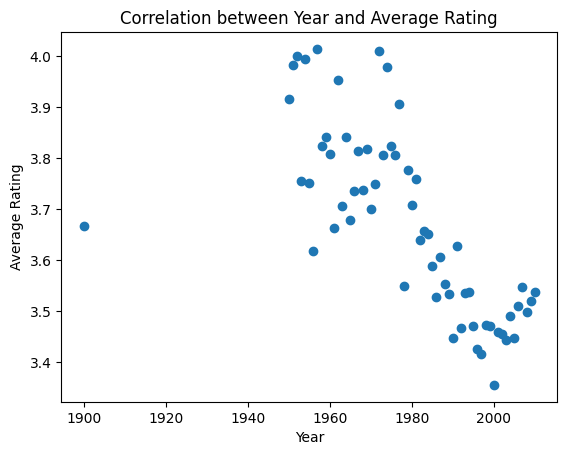

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(average_ratings.index, average_ratings.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Correlation between Year and Average Rating')
plt.show()

```
import matplotlib.pyplot as plt
```
В этой строке кода мы импортируем модуль `matplotlib.pyplot`, который позволяет нам создавать и отображать различные графики и визуализации данных.
```
plt.scatter(average_ratings.index, average_ratings.values)
```
Эта строка кода создает точечную диаграмму (scatter plot) на основе данных `average_ratings.index` и `average_ratings.values`. `average_ratings.index` представляет индексы (x-значения) данных, а `average_ratings.values` - сами значения (y-значения) данных. Точечная диаграмма позволяет наглядно представить связь между двумя переменными.
```
plt.xlabel('Year')
```
Эта строка кода устанавливает подпись оси x на графике. В данном случае, ось x будет подписана как "Year".
```
plt.ylabel('Average Rating')
```
Эта строка кода устанавливает подпись оси y на графике. В данном случае, ось y будет подписана как "Average Rating".
```
plt.title('Correlation between Year and Average Rating')
```
Эта строка кода устанавливает заголовок для графика. В данном случае, заголовок будет "Correlation between Year and Average Rating".
```
plt.show()
```
Эта строка кода отображает график в окне. `show()` просто показывает график на экране и позволяет нам его увидеть. Если эту строку пропустить, то график не будет показан.

In [ ]:
import numpy as np

correlation = np.corrcoef(average_ratings.index, average_ratings.values)[0, 1]
print("Коэффициент корреляции:", correlation)


Коэффициент корреляции: -0.711336854508523


```
import numpy as np
```
В этой строке кода мы импортируем модуль `numpy`, который предоставляет функции и методы для работы с массивами и математическими операциями.
```
correlation = np.corrcoef(average_ratings.index, average_ratings.values)[0, 1]
```
Эта строка кода вычисляет коэффициент корреляции между двумя массивами данных: `average_ratings.index` и `average_ratings.values`. Функция `corrcoef` из модуля `numpy` используется для вычисления матрицы корреляции. Первый аргумент - это массив иксов (x-значений), а второй аргумент - это массив игреков (y-значений). `[0, 1]` в квадратных скобках используется для выбора конкретного элемента из матрицы корреляции, где 0 соответствует строке 0 и столбцу 1. Таким образом, `correlation` будет содержать значение коэффициента корреляции.

## Вывод:

Исходя из полученного значения коэффициента корреляции (-0.711), можно сделать вывод, что между годом выпуска фильма и средним рейтингом фильма существует некоторая обратная связь. Однако, коэффициент корреляции не указывает на причинно-следственную связь между этими переменными.

Коэффициент корреляции -0.711 говорит о том, что существует отрицательная корреляция между годом выпуска и средним рейтингом фильма. Это означает, что в общем случае, более старые фильмы имеют более высокий средний рейтинг, и наоборот - более новые фильмы имеют более низкий средний рейтинг. 

Однако, следует отметить, что коэффициент корреляции -0.711 не является очень сильным и может быть рассмотрен как слабая связь между переменными. Поэтому, сложно сделать однозначный вывод о том, что раньше снимали "настоящее" кино, основываясь только на этом коэффициенте корреляции.